In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import spacy
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS

pd.set_option('mode.chained_assignment', None)

# spacy.prefer_gpu()

# nlp = spacy.load("pt_core_news_sm")

In [2]:
DATASET_1 = 'fakeWhatsApp.BR_2020_partial.csv'
DATASET_2 = 'wpp_2020_stage1.csv'

In [3]:
# df = pd.read_csv(f'data/2020/{DATASET_1}')
df1 = pd.read_csv(os.path.join('data', '2020', DATASET_1))
# df2 = pd.read_csv(os.path.join('data', '2020', DATASET_2))

In [4]:
df = df1
df.shape, df.columns

((2899, 5),
 Index(['shares', 'text', 'misinformation', 'source', 'revision'], dtype='object'))

In [5]:
df.head()

shares                                               text  misinformation  \
0      27  O ministro da Ciência, Tecnologia, Inovações e...             0.0   
1      26  Pesquisa com mais de 6.000 médicos em 30 paíse...             1.0   
2      25  É com muita alegria que comunico que mais um p...             0.0   
3      25  Renda Brasil unificará vários programas sociai...             0.0   
4      24  O Secretário-Geral da OTAN Jens Stoltenberg ta...             0.0   

                                              source  revision  
0  https://www.gov.br/pt-br/noticias/educacao-e-p...       NaN  
1  https://www.aosfatos.org/noticias/e-falso-que-...       NaN  
2  http://portal.mec.gov.br/component/content/art...       NaN  
3  https://agenciabrasil.ebc.com.br/politica/noti...       NaN  
4                                                NaN       1.0

<AxesSubplot:>

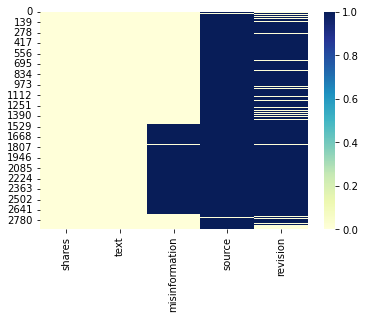

In [6]:
sns.heatmap(df.isna(), cmap='YlGnBu')

In [7]:
df['text'].notnull().sum(), df.shape[0]

(2898, 2899)

In [8]:
df = df[df['text'].notnull()]

In [9]:
df['text']

0       O ministro da Ciência, Tecnologia, Inovações e...
1       Pesquisa com mais de 6.000 médicos em 30 paíse...
2       É com muita alegria que comunico que mais um p...
3       Renda Brasil unificará vários programas sociai...
4       O Secretário-Geral da OTAN Jens Stoltenberg ta...
                              ...                        
2894    A torcida do corona deve estar arrancando os c...
2895    “OS EUA E O CORONAVÍRUS :\r\n\r\nAcabei de ass...
2896    Estatísticas falsas conforme depoimentos colhi...
2897    Atenção => 🇧🇷💓💓💓 *MUITO IMPORTANTE! "Como é qu...
2898    [2:36 PM, 11/06/2020] Wellington: ```*ALERTA A...
Name: text, Length: 2898, dtype: object

In [10]:
df = df[df['misinformation'].notnull()]

## Distribuição das classes

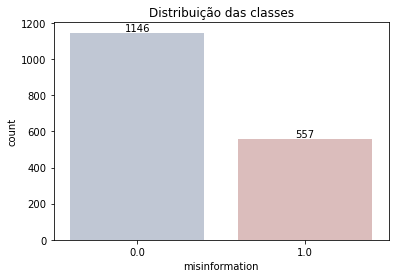

In [11]:
plt.hist(df['misinformation'])
plt.title("Distribuição das classes")
ax = sns.countplot(x='misinformation', data=df, palette='vlag')
ax.bar_label(ax.containers[1])
plt.show()

In [12]:
# df = df[['text', 'misinformation']]

In [13]:
df['text']

0       O ministro da Ciência, Tecnologia, Inovações e...
1       Pesquisa com mais de 6.000 médicos em 30 paíse...
2       É com muita alegria que comunico que mais um p...
3       Renda Brasil unificará vários programas sociai...
4       O Secretário-Geral da OTAN Jens Stoltenberg ta...
                              ...                        
2894    A torcida do corona deve estar arrancando os c...
2895    “OS EUA E O CORONAVÍRUS :\r\n\r\nAcabei de ass...
2896    Estatísticas falsas conforme depoimentos colhi...
2897    Atenção => 🇧🇷💓💓💓 *MUITO IMPORTANTE! "Como é qu...
2898    [2:36 PM, 11/06/2020] Wellington: ```*ALERTA A...
Name: text, Length: 1703, dtype: object

In [14]:
import os
import nltk
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

STOPWORDS = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/tales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
def count_chars(text):
    """Counts the number of characters in a message."""
    return len(text)

def count_words(text):
    """Counts the number of words in a message."""
    return len(text.split())

def count_capital_chars(text):
    """Counts the number of capital characters in a message."""
    counter = 0
    for word in text:
        if word.isupper():
            counter += 1
    return counter

def count_capital_words(text):
    """Counts the number of capital words in a message."""
    return sum(map(str.isupper, text.split()))

def count_punctuations(text):
    """Return a dictionary of 32 punctuation counts."""
    punctuations="""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
    
    punctuactions_countings = dict()
    
    for punct in punctuations:
        punctuactions_countings[str(punct) + ' count'] = text.count(punct)
        
    return punctuactions_countings

def count_words_in_quotes(text):
    """Counts the number of words in both single and double quotation."""
    x = re.findall("""'.'|".""""", text)
    
    counter = 0
    
    if x is None:
        return 0
    else:
        for index in x:
            t = index[1:-1]
            counter += count_words(t)
        return counter

def count_sent(text):
    """Counts the number of sentences in a message."""
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    """Counts the number of unique words in a message."""
    return len(set(text.split()))

def count_htags(text):
    """Counts the number of hashtags in a text."""
    htags_w = re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', text)
    return len(htags_w)

def count_mentions(text):
    """Counts the amount of times users have been mentioned."""
    mentions_w = re.findall(r'\B@\w+', text)
    return len(mentions_w)

def count_stopwords(text):
    """Count the number of stopwords in a message."""
    stop_words = set(STOPWORDS)
    word_tokens = word_tokenize(text)
    stopwords_x = [word for word in word_tokens if word in stop_words]
    return len(stopwords_x)

def count_links(text):
    """Counts the number of links present in a message."""
    pattern = r"(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
    return len(re.findall(pattern, text))

In [16]:
#count_capital_words("adiAoasjioddjhs #test #adsAAdosa afim ADEU1")
# df["text"].apply(lambda msg: count_words(msg))
# df2 = df.copy()

# df['word_count'] = df["text"].apply(lambda msg: count_words(msg))
# df['htag_count']         = df["text"].apply(lambda msg: count_htags(msg))

In [17]:
df['char_count']         = df["text"].apply(lambda msg: count_chars(msg))
df['word_count']         = df["text"].apply(lambda msg: count_words(msg))
df['sent_count']         = df["text"].apply(lambda msg: count_sent(msg))
df['capital_char_count'] = df["text"].apply(lambda msg: count_capital_chars(msg))
df['capital_word_count'] = df["text"].apply(lambda msg: count_capital_words(msg))
df['quoted_word_count']  = df["text"].apply(lambda msg: count_words_in_quotes(msg))
df['stopword_count']     = df["text"].apply(lambda msg: count_stopwords(msg))
df['unique_word_count']  = df["text"].apply(lambda msg: count_unique_words(msg))
df['htag_count']         = df["text"].apply(lambda msg: count_htags(msg))
df['mention_count']      = df["text"].apply(lambda msg: count_mentions(msg))
df['punct_count']        = df["text"].apply(lambda msg: count_punctuations(msg))
df['avg_wordlength']     = df['char_count'] / df['word_count']
df['avg_sentlength']     = df['word_count'] / df['sent_count']
df['unique_vs_words']    = df['unique_word_count'] / df['word_count']
df['stopwords_vs_words'] = df['stopword_count'] / df['word_count']
df['links_count']        = df["text"].apply(lambda msg: count_links(msg))

In [18]:
df.head(3)

shares                                               text  misinformation  \
0      27  O ministro da Ciência, Tecnologia, Inovações e...             0.0   
1      26  Pesquisa com mais de 6.000 médicos em 30 paíse...             1.0   
2      25  É com muita alegria que comunico que mais um p...             0.0   

                                              source  revision  char_count  \
0  https://www.gov.br/pt-br/noticias/educacao-e-p...       NaN         634   
1  https://www.aosfatos.org/noticias/e-falso-que-...       NaN         283   
2  http://portal.mec.gov.br/component/content/art...       NaN         653   

   word_count  sent_count  capital_char_count  capital_word_count  ...  \
0          76           5                  10                   3  ...   
1          20           2                   1                   0  ...   
2          95           6                  20                   4  ...   

   stopword_count  unique_word_count  htag_count  mention_count  \
0              28                 61           0              0   
1               9                 19           0              0   
2              40                 77           0              0   

                                         punct_count avg_wordlength  \
0  {'! count': 0, '" count': 0, '# count': 0, '$ ...       8.342105   
1  {'! count': 0, '" count': 0, '# count': 0, '$ ...      14.150000   
2  {'! count': 5, '" count': 0, '# count': 0, '$ ...       6.873684   

   avg_sentlength  unique_vs_words  stopwords_vs_words  links_count  
0       15.200000         0.802632            0.368421            1  
1       10.000000         0.950000            0.450000            1  
2       15.833333         0.810526            0.421053            1  

[3 rows x 21 columns]

In [19]:
df.shape

(1703, 21)

### Removing links

In [20]:
pttrn = r"(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"

In [21]:
df['clean_text'] = df['text'].apply(lambda txt: re.sub(pttrn, " ",txt))
# df['text'] = df['text'].apply(lambda txt: re.split(r'(http|https):\/\/.*', str(txt))[0])
# df['text'] = df['text'].apply(lambda txt: re.split(r'http', str(txt))[0])

In [22]:
df.head()

shares                                               text  misinformation  \
0      27  O ministro da Ciência, Tecnologia, Inovações e...             0.0   
1      26  Pesquisa com mais de 6.000 médicos em 30 paíse...             1.0   
2      25  É com muita alegria que comunico que mais um p...             0.0   
3      25  Renda Brasil unificará vários programas sociai...             0.0   
4      24  O Secretário-Geral da OTAN Jens Stoltenberg ta...             0.0   

                                              source  revision  char_count  \
0  https://www.gov.br/pt-br/noticias/educacao-e-p...       NaN         634   
1  https://www.aosfatos.org/noticias/e-falso-que-...       NaN         283   
2  http://portal.mec.gov.br/component/content/art...       NaN         653   
3  https://agenciabrasil.ebc.com.br/politica/noti...       NaN         484   
4                                                NaN       1.0         370   

   word_count  sent_count  capital_char_count  capital_word_count  ...  \
0          76           5                  10                   3  ...   
1          20           2                   1                   0  ...   
2          95           6                  20                   4  ...   
3          60           4                  12                   2  ...   
4          52           2                  27                   5  ...   

   unique_word_count  htag_count  mention_count  \
0                 61           0              0   
1                 19           0              0   
2                 77           0              0   
3                 50           0              0   
4                 46           0              0   

                                         punct_count  avg_wordlength  \
0  {'! count': 0, '" count': 0, '# count': 0, '$ ...        8.342105   
1  {'! count': 0, '" count': 0, '# count': 0, '$ ...       14.150000   
2  {'! count': 5, '" count': 0, '# count': 0, '$ ...        6.873684   
3  {'! count': 0, '" count': 0, '# count': 0, '$ ...        8.066667   
4  {'! count': 1, '" count': 2, '# count': 1, '$ ...        7.115385   

  avg_sentlength  unique_vs_words  stopwords_vs_words  links_count  \
0      15.200000         0.802632            0.368421            1   
1      10.000000         0.950000            0.450000            1   
2      15.833333         0.810526            0.421053            1   
3      15.000000         0.833333            0.283333            1   
4      26.000000         0.884615            0.288462            1   

                                          clean_text  
0  O ministro da Ciência, Tecnologia, Inovações e...  
1  Pesquisa com mais de 6.000 médicos em 30 paíse...  
2  É com muita alegria que comunico que mais um p...  
3  Renda Brasil unificará vários programas sociai...  
4  O Secretário-Geral da OTAN Jens Stoltenberg ta...  

[5 rows x 22 columns]

### Removing leading/trailing whitespaces

In [23]:
df['clean_text'] = df['clean_text'].apply(lambda txt: txt.strip())

In [24]:
df['clean_text']

0       O ministro da Ciência, Tecnologia, Inovações e...
1       Pesquisa com mais de 6.000 médicos em 30 paíse...
2       É com muita alegria que comunico que mais um p...
3       Renda Brasil unificará vários programas sociai...
4       O Secretário-Geral da OTAN Jens Stoltenberg ta...
                              ...                        
2894    A torcida do corona deve estar arrancando os c...
2895    “OS EUA E O CORONAVÍRUS :\r\n\r\nAcabei de ass...
2896    Estatísticas falsas conforme depoimentos colhi...
2897    Atenção => 🇧🇷💓💓💓 *MUITO IMPORTANTE! "Como é qu...
2898    [2:36 PM, 11/06/2020] Wellington: ```*ALERTA A...
Name: clean_text, Length: 1703, dtype: object

In [25]:
# Proximos passos

# Remover risadas
# Colocar termos em minúsculos
# Remover stopwords
# ???
# Tentar bag of words??

In [26]:
PATTERN_1 = r"(k|K){2,}"
PATTERN_2 = r"((h|H)(a|A)){2,}"

In [27]:
df['has_lol'] = df['text'].apply(lambda txt: bool(re.search(pattern=PATTERN_1, string=txt)))

df['has_lol'].value_counts()

False    1690
True       13
Name: has_lol, dtype: int64

In [28]:
df['clean_text'] = df['clean_text'].apply(lambda txt: re.sub(pattern=PATTERN_1, repl="", string=txt))

In [29]:
df['has_lol'] = df['text'].apply(lambda txt: bool(re.search(pattern=PATTERN_1, string=txt)))

df['has_lol'].value_counts()

False    1690
True       13
Name: has_lol, dtype: int64

In [30]:
df['text'].iloc[0]

'O ministro da Ciência, Tecnologia, Inovações e Comunicações, Marcos Pontes, afirmou, nesta terça-feira (9), que foram iniciados os novos testes com o vermífugo nitazoxanida em pacientes que tenham sido infectados pelo novo coronavírus. A novidade é que a partir de agora pacientes assintomáticos também serão testados. Basta ter a confirmação do coronavírus. O primeiro protocolo de testes trabalha com pessoas com febre e início de pneumonia, com o chamado “vidro fosco” na tomografia do pulmão.\r\nhttps://dunapress.org/2020/06/11/governo-jair-bolsonaro-atraves-do-mctic-inicia-segundo-protocolo-de-testes-clinicos-com-a-nitazoxanida/'

In [31]:
df['has_lol'] = df['text'].apply(lambda txt: bool(re.search(pattern=PATTERN_2, string=txt)))

df['has_lol'].value_counts()

False    1703
Name: has_lol, dtype: int64

In [32]:
# Removendo letras maiúsculas do texto limpo
df['clean_text'] = df['clean_text'].apply(lambda txt: txt.lower())
df.reset_index(inplace=True)

In [33]:
df.head(3)

index  shares                                               text  \
0      0      27  O ministro da Ciência, Tecnologia, Inovações e...   
1      1      26  Pesquisa com mais de 6.000 médicos em 30 paíse...   
2      2      25  É com muita alegria que comunico que mais um p...   

   misinformation                                             source  \
0             0.0  https://www.gov.br/pt-br/noticias/educacao-e-p...   
1             1.0  https://www.aosfatos.org/noticias/e-falso-que-...   
2             0.0  http://portal.mec.gov.br/component/content/art...   

   revision  char_count  word_count  sent_count  capital_char_count  ...  \
0       NaN         634          76           5                  10  ...   
1       NaN         283          20           2                   1  ...   
2       NaN         653          95           6                  20  ...   

   htag_count  mention_count  \
0           0              0   
1           0              0   
2           0              0   

                                         punct_count  avg_wordlength  \
0  {'! count': 0, '" count': 0, '# count': 0, '$ ...        8.342105   
1  {'! count': 0, '" count': 0, '# count': 0, '$ ...       14.150000   
2  {'! count': 5, '" count': 0, '# count': 0, '$ ...        6.873684   

   avg_sentlength  unique_vs_words stopwords_vs_words  links_count  \
0       15.200000         0.802632           0.368421            1   
1       10.000000         0.950000           0.450000            1   
2       15.833333         0.810526           0.421053            1   

                                          clean_text  has_lol  
0  o ministro da ciência, tecnologia, inovações e...    False  
1  pesquisa com mais de 6.000 médicos em 30 paíse...    False  
2  é com muita alegria que comunico que mais um p...    False  

[3 rows x 24 columns]

## Visualizando frequência das palavras

In [34]:
from wordcloud import WordCloud

In [35]:
# text = " ".join(df['clean_text'])
text_misinfo = " ".join(df[df['misinformation'] == 1]['clean_text'])
text_info = " ".join(df[df['misinformation'] == 0]['clean_text'])

(-0.5, 749.5, 499.5, -0.5)

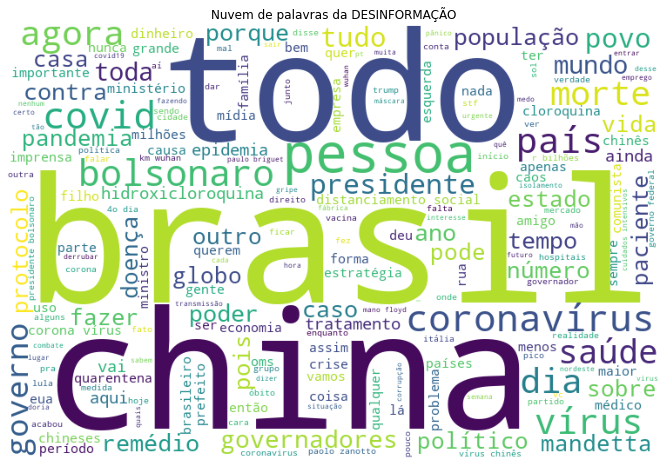

In [36]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=750, height=500).generate(text_misinfo)

plt.figure(figsize=(18, 8))
plt.title("Nuvem de palavras da DESINFORMAÇÃO")
plt.imshow(wc)
plt.axis("off")

In [37]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=750, height=500).generate(text_info)

plt.figure(figsize=(18, 8))
plt.title("Nuvem de palavras da informação")
plt.imshow(wc)
plt.axis("off")

(-0.5, 749.5, 499.5, -0.5)

In [38]:
df[df['misinformation'] == 1]['clean_text']

1       pesquisa com mais de 6.000 médicos em 30 paíse...
8       china força países atingidos por vírus chinês ...
21      herança maldita: mandetta renova contratos de ...
28      @elmindop 💯% patriota!\r\n*vamos acordar brasi...
32      gente, isso é extremamente grave!!! mandetta a...
                              ...                        
1688    já não bastou ser teleguiados por revista "sie...
1691    a dor de perder quem amamos\r\n\r\nvovó morre ...
1694    mandetta está errado”, diz paolo zanotto, viro...
1700    estatísticas falsas conforme depoimentos colhi...
1702    [2:36 pm, 11/06/2020] wellington: ```*alerta a...
Name: clean_text, Length: 557, dtype: object

# Trabalhando com reconhecimento de entidades nomeadas

In [39]:
import spacy
from spacy import displacy
import pt_core_news_sm

nlp = spacy.load('pt_core_news_sm')
# nlp = spacy.load('pt_core_news_md')

nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']

In [40]:
# nlp_ = spacy.load('en_core_web_sm')
# # nlp_.get_pipe("ner").labels

# doc_ = nlp_("Claims are made that covid-19 has been surged in Wuhan, China")

# displacy.render(doc_, style="ent")

In [41]:
df[df['misinformation'] == 1].head(10)[6:]

index  shares                                               text  \
39     39      22  Organização Mundial de Saúde: O aborto é “esse...   
48     48      20  @ElmindoP 💯% PATRIOTA!\r\nVAMOS ACORDAR BRASIL...   
50     50      18  Prezados amigos.. vocês sabiam que, todos os p...   
53     53      15  🔵 Internet gratuita de 500 GB 4G   🔵 Por causa...   

    misinformation source  revision  char_count  word_count  sent_count  \
39             1.0    NaN       1.0         232          15           2   
48             1.0    NaN       NaN         292          30           4   
50             1.0    NaN       NaN        1113         177           6   
53             1.0    NaN       NaN         242          41           2   

    capital_char_count  ...  htag_count  mention_count  \
39                   4  ...           0              0   
48                 183  ...           3              1   
50                 218  ...           0              0   
53                  15  ...           0              0   

                                          punct_count  avg_wordlength  \
39  {'! count': 0, '" count': 0, '# count': 0, '$ ...       15.466667   
48  {'! count': 5, '" count': 0, '# count': 3, '$ ...        9.733333   
50  {'! count': 2, '" count': 0, '# count': 0, '$ ...        6.288136   
53  {'! count': 1, '" count': 0, '# count': 0, '$ ...        5.902439   

    avg_sentlength  unique_vs_words stopwords_vs_words  links_count  \
39             7.5         0.933333           0.266667            1   
48             7.5         1.000000           0.000000            1   
50            29.5         0.836158           0.322034            0   
53            20.5         0.829268           0.268293            1   

                                           clean_text  has_lol  
39  organização mundial de saúde: o aborto é “esse...    False  
48  @elmindop 💯% patriota!\r\nvamos acordar brasil...    False  
50  prezados amigos.. vocês sabiam que, todos os p...    False  
53  🔵 internet gratuita de 500 gb 4g   🔵 por causa...    False  

[4 rows x 24 columns]

In [42]:
INDEX = 38

target_txt = df['text'][INDEX]
print(target_txt)
print(df['misinformation'][INDEX])

Objetivo é assegurar a continuidade do serviço de acolhimento, considerado essencial, e a segurança dos trabalhadores da rede socioassistencial. Diante do aumento do número de casos de agressão contra mulheres durante o período de isolamento social motivado pela pandemia de Covid-19, o Governo Federal publicou nesta terça-feira (02.06) uma portaria com orientações para o atendimento de vítimas pelo Sistema Único de Assistência Social (SUAS)...
https://dunapress.org/2020/06/09/portaria-garante-atendimento-as-mulheres-vitimas-de-violencia/
0.0


In [43]:
doc = nlp(target_txt)

In [44]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
    else:
        print('Nenhuma entidade encotrada')

In [45]:
show_ents(doc)

Covid-19 - LOC - Non-GPE locations, mountain ranges, bodies of water
Governo Federal - LOC - Non-GPE locations, mountain ranges, bodies of water
Sistema Único de Assistência Social - ORG - Companies, agencies, institutions, etc.


In [46]:
displacy.render(doc, style="ent")

In [47]:
nlp.get_pipe("ner").labels

('LOC', 'MISC', 'ORG', 'PER')

### Conclusão

O reconhecedor de entidade nomeada **não faz uma boa dinstição** das classes de entidades. Precisamos fazer um retreinamento adicional para que possamos obter uma classificação mais assertiva.

In [48]:
TRAIN_DATA = [
    ("Altamira é uma ótima pessoa, gosto muito dela", {"entities": [(0, 8, "PER")]}),
    ("João foi para Bahia nas férias", {"entities": [(14, 19, "LOC"), (0, 4, "PER")]}),
    ("Carlos foi visitar João na casa de praia", {"entities": [(0, 6, "PER"), (19, 23, "PER")]}),
    ("No meio do ano irei para São Paulo fazer mais um curso", {"entities": [(25, 34, "LOC")]}),
    ("O sonho dela era ir para Austrália visitar seu irmão", {"entities": [(25, 34, "LOC")]}),
    ("Em 15/07/1988 nasceu essa linda criança", {"entities": [(3, 13, "DATE")]}),
    ("Data de prisão: 10/01/2018", {"entities": [(16, 26, "DATE")]}),
    ("No dia 01/02/2016 foi decretada a sentença", {"entities": [(7, 17, "DATE")]}),
    ("A data da festa foi 07/05/2018", {"entities": [(20, 30, "DATE")]}),
    ("Dia 07/06/2020 choveu pela manhã", {"entities": [(4, 14, "DATE")]}),
    ("Michael Jackson nasceu dia 29/08/1958", {"entities": [(0, 15, "PER"), (27, 37, "DATE")]}),
    ("A viagem foi marcada para o dia 21/03/2021", {"entities": [(32, 42, "DATE")]}),
    ("O casamento, que era dia 12/06/2020, foi adiado para o dia 20/07/2020", {"entities": [(25, 35, "DATE"), (59, 69, "DATE")]}),
    ("Dia 21/04/2020 foi feriado", {"entities": [(4, 14, "DATE")]}),
    ("A entrega foi realizada na manhã do dia 18/03/2020", {"entities": [(40, 50, "DATE")]}),
    ("Na noite do dia 17/05/2019 aconteceu um eclipse", {"entities": [(16, 26, "DATE")]}),
    ("Fortaleza é a capital do Ceará", {"entities": [(0, 9, "LOC"), (25, 30, "LOC")]}),
    ("Entende-se que o coronavírus surgiu em Wuhan, China", {"entities": [(17, 28, "AIF"), (39, 44, "LOC"), (46, 51, "LOC")]}),
    ("A tuberculose é transmitida pelos bacilos expelidos por um indivíduo contaminado quando tosse, fala, espirra ou cospe", {"entities": [(2, 13, "DIS")]}),
    
]

# ""[2:13]

In [49]:
def display_entities():
    for tupl in TRAIN_DATA:
        for ent in tupl[1]['entities']:
            print(f"{tupl[0][ent[0]: ent[1]]} | {ent[2]}")
        # print("")
        
display_entities()

Altamira | PER
Bahia | LOC
João | PER
Carlos | PER
João | PER
São Paulo | LOC
Austrália | LOC
15/07/1988 | DATE
10/01/2018 | DATE
01/02/2016 | DATE
07/05/2018 | DATE
07/06/2020 | DATE
Michael Jackson | PER
29/08/1958 | DATE
21/03/2021 | DATE
12/06/2020 | DATE
20/07/2020 | DATE
21/04/2020 | DATE
18/03/2020 | DATE
17/05/2019 | DATE
Fortaleza | LOC
Ceará | LOC
coronavírus | AIF
Wuhan | LOC
China | LOC
tuberculose | DIS


In [50]:
def train_spacy(data, n_iter):
    """Carrega o modelo, configura o pipeline e treina o reconhecedor de entidades"""
    
    # Carrega um modelo do spacy pré-configurado
    train_data = data
    
    try:
        nlp = pt_core_news_sm.load()
        print("Modelo carregado!")
    except Exception as exp:
        raise exp
    
    # Criar os componentes internos do pipeline e adicioná-los ao pipeline
    # nlp.create_pipe irá funcionar para os já presentes no spacy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # Caso contrário, obter o default para adicionar as labels
    else:
        ner = nlp.get_pipe("ner")
    
    # Adicionar as labels
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])
    
    # Evitar alterar comportamento dos outros módulos que não são NER
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    
    # Treina somente o NER
    with nlp.disable_pipes(*other_pipes):
        spacy.util.fix_random_seed()
        optimizer = nlp.begin_training()
        
        for itn in range(n_iter):
            random.seed(10)
            random.shuffle(train_data)
            losses = {}
    
            for texts, annotations in train_data:
                nlp.update(
                    [texts], # batch de textos
                    [annotations], # batch de anotações
                    drop=0.2, # dificultar a memorização dos dados
                    sgd=optimizer,
                    losses=losses
                )
            print("Losses", losses)
    
    # Test the trained model
    for text, _ in train_data:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type) for t in doc])
        print("")
    
    return nlp

In [51]:
# nlp = train_spacy(data=TRAIN_DATA, n_iter=100)

# Aplicando o modelo

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
# Criar instância da classe tfidf
tfidf = TfidfVectorizer(stop_words=STOPWORDS)

In [54]:
# Construir a matrix TF-IDF ajustando e transformando os dados
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

In [55]:
tfidf_matrix.shape

(1703, 16811)

In [56]:
from sklearn.metrics.pairwise import linear_kernel

In [57]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [58]:
cosine_sim.shape

(1703, 1703)

In [59]:
idxs = pd.Series(df.index)

In [60]:
def get_recommendations(index, cosine_sim):
    try:
        idx = idxs.iloc[index]
    except KeyError:
        print('Index not found!')
        return None
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    msg_indices = [score[0] for score in sim_scores]
    
    return msg_indices

In [61]:
MSG_INDEX = 4

print(df[['text']].iloc[MSG_INDEX]['text'])

O Secretário-Geral da OTAN Jens Stoltenberg também ex Primeiro Ministro da Noruega 2000-2013 em seu pronunciamento sobre o lançamento do programa #NATO2030 - Fortalecendo a Aliança em um mundo cada vez mais competitivo deixa a seguinte mensagem: "A aliança precisa e deve enfrentar a China!", OTAN Vídeo: Hoje no mundo Militar...
https://dunapress.org/2020/06/11/50619/


In [62]:
recommended_indexes = get_recommendations(MSG_INDEX, cosine_sim)
eval_df = df[['clean_text', 'misinformation']].iloc[recommended_indexes]

df[['text']].iloc[recommended_indexes]

text
1396  Parece que o embaixador da China é o GOVERNADO...
1353  Está uma corrida pela vacina no mundo , quem v...
1545  A libertação do Peixe, traficante, “dono” da f...
1281               A china já está fodendo o mundo todo
909   A libertação do Peixe, traficante, “dono” da f...

In [63]:
int(eval_df['misinformation'].sum())

3

In [64]:
def calculate_rating(index):
    recommended_indexes = get_recommendations(index, cosine_sim)
    eval_df = df[['clean_text', 'misinformation']].iloc[recommended_indexes]
    return int(eval_df['misinformation'].sum())

In [65]:
# df['ratings'] = df.apply(calculate_rating, axis=0)

# df['ratings'] = pd.Series(ratings)

ratings = []

for index, row in df.iterrows():
    rating = calculate_rating(index)
    ratings.append(rating)

In [66]:
df['rating'] = pd.Series(ratings)

In [67]:
df[['clean_text', 'rating', 'misinformation']]

clean_text  rating  \
0     o ministro da ciência, tecnologia, inovações e...       4   
1     pesquisa com mais de 6.000 médicos em 30 paíse...       2   
2     é com muita alegria que comunico que mais um p...       0   
3     renda brasil unificará vários programas sociai...       2   
4     o secretário-geral da otan jens stoltenberg ta...       3   
...                                                 ...     ...   
1698  a torcida do corona deve estar arrancando os c...       1   
1699  “os eua e o coronavírus :\r\n\r\nacabei de ass...       3   
1700  estatísticas falsas conforme depoimentos colhi...       1   
1701  atenção => 🇧🇷💓💓💓 *muito importante! "como é qu...       2   
1702  [2:36 pm, 11/06/2020] wellington: ```*alerta a...       5   

      misinformation  
0                0.0  
1                1.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
1698             0.0  
1699             0.0  
1700             1.0  
1701             0.0  
1702             1.0  

[1703 rows x 3 columns]

In [68]:
df['rating'].value_counts()

1    597
0    376
2    242
3    201
4    156
5    131
Name: rating, dtype: int64

In [69]:
# correct_values = [True for index, row in df.iterrows() if row['rating'] ]
correct_values = []

for index, row in df.iterrows():
    if row['rating'] > 2 and row['misinformation'] == 0.0:
        correct_values.append(True)
    if row['rating'] > 2 and row['misinformation'] == 1.0:
        correct_values.append(False)
    if row['rating'] <= 2 and row['misinformation'] == 1.0:
        correct_values.append(True)
    if row['rating'] <= 2 and row['misinformation'] == 1.0:
        correct_values.append(False)
    
df['correct'] = pd.Series(correct_values)

In [70]:
df['correct'].value_counts()

False    557
True     349
Name: correct, dtype: int64

In [71]:
df.columns

Index(['index', 'shares', 'text', 'misinformation', 'source', 'revision',
       'char_count', 'word_count', 'sent_count', 'capital_char_count',
       'capital_word_count', 'quoted_word_count', 'stopword_count',
       'unique_word_count', 'htag_count', 'mention_count', 'punct_count',
       'avg_wordlength', 'avg_sentlength', 'unique_vs_words',
       'stopwords_vs_words', 'links_count', 'clean_text', 'has_lol', 'rating',
       'correct'],
      dtype='object')

In [72]:
df['capital_word_count'].value_counts()

0      730
1      237
2      122
3       69
4       49
      ... 
119      1
63       1
314      1
703      1
93       1
Name: capital_word_count, Length: 94, dtype: int64

In [73]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df, x='misinformation', y='capital_word_count', palette="seismic", kind='strip')

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

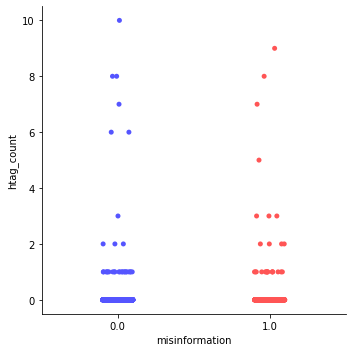

In [74]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df, x='misinformation', y='htag_count', palette="seismic", kind='strip')

<Figure size 576x432 with 0 Axes>

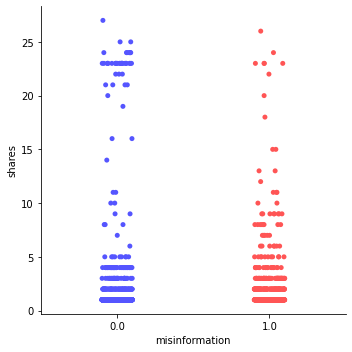

In [75]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df, x='misinformation', y='shares', palette="seismic", kind='strip')